# Carga de Datos

In [1]:
# Librerias:
# Manejo de datos
import pandas as pd
#pd.set_option('display.max_columns', 500)
import numpy as np

# Visualizacion da datos
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()           

# Statistics Metric
from scipy.stats import ks_2samp

# Machine Learning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

# Metrics
from sklearn.metrics import make_scorer

# Models
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Para exportacion:
import joblib
import json

# Random seed
SEED = 12345

In [2]:
# df de entrenamiento = df0
df0 = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 13/gold_recovery_train.csv')
# df de prueba = df1
df1 = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 13/gold_recovery_test.csv')
# Carga del DataFrame completo:
df = pd.read_csv('/home/andres/anaconda_projects/TripleTen/Sprint 13/gold_recovery_full.csv')

El DataFrame de entrenamiento tiene valores ausentes. Filas con valores ausentes no afectan a las medidas pues son entradas de medidas no registradas en el proceso 'Roughe'. Se eliminaran y se mostrara la data limpia.

In [3]:
# df de entrenamiento
df0 = df0.dropna().reset_index(drop=1)
print(df0.info())
display(df0.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11017 non-null  object 
 1   final.output.concentrate_ag                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.concentrate_au                         11017 non-null  float64
 5   final.output.recovery                               11017 non-null  float64
 6   final.output.tail_ag                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                               11017 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [4]:
# DataFrame de Prueba
df1 = df1.dropna().reset_index(drop=1)
df1.info()
display(df1.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5383 non-null   object 
 1   primary_cleaner.input.sulfate               5383 non-null   float64
 2   primary_cleaner.input.depressant            5383 non-null   float64
 3   primary_cleaner.input.feed_size             5383 non-null   float64
 4   primary_cleaner.input.xanthate              5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


In [5]:
# Info del DataFrame final (Elimino los valores NaN's porque son valores sin medidas realizadas aun en la linea del tiempo)
df = df.dropna().reset_index(drop=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16094 non-null  object 
 1   final.output.concentrate_ag                         16094 non-null  float64
 2   final.output.concentrate_pb                         16094 non-null  float64
 3   final.output.concentrate_sol                        16094 non-null  float64
 4   final.output.concentrate_au                         16094 non-null  float64
 5   final.output.recovery                               16094 non-null  float64
 6   final.output.tail_ag                                16094 non-null  float64
 7   final.output.tail_pb                                16094 non-null  float64
 8   final.output.tail_sol                               16094 non-null  float64


La flotacion Roughe consta de dos limpiezas antes de obtener el concentrado final:

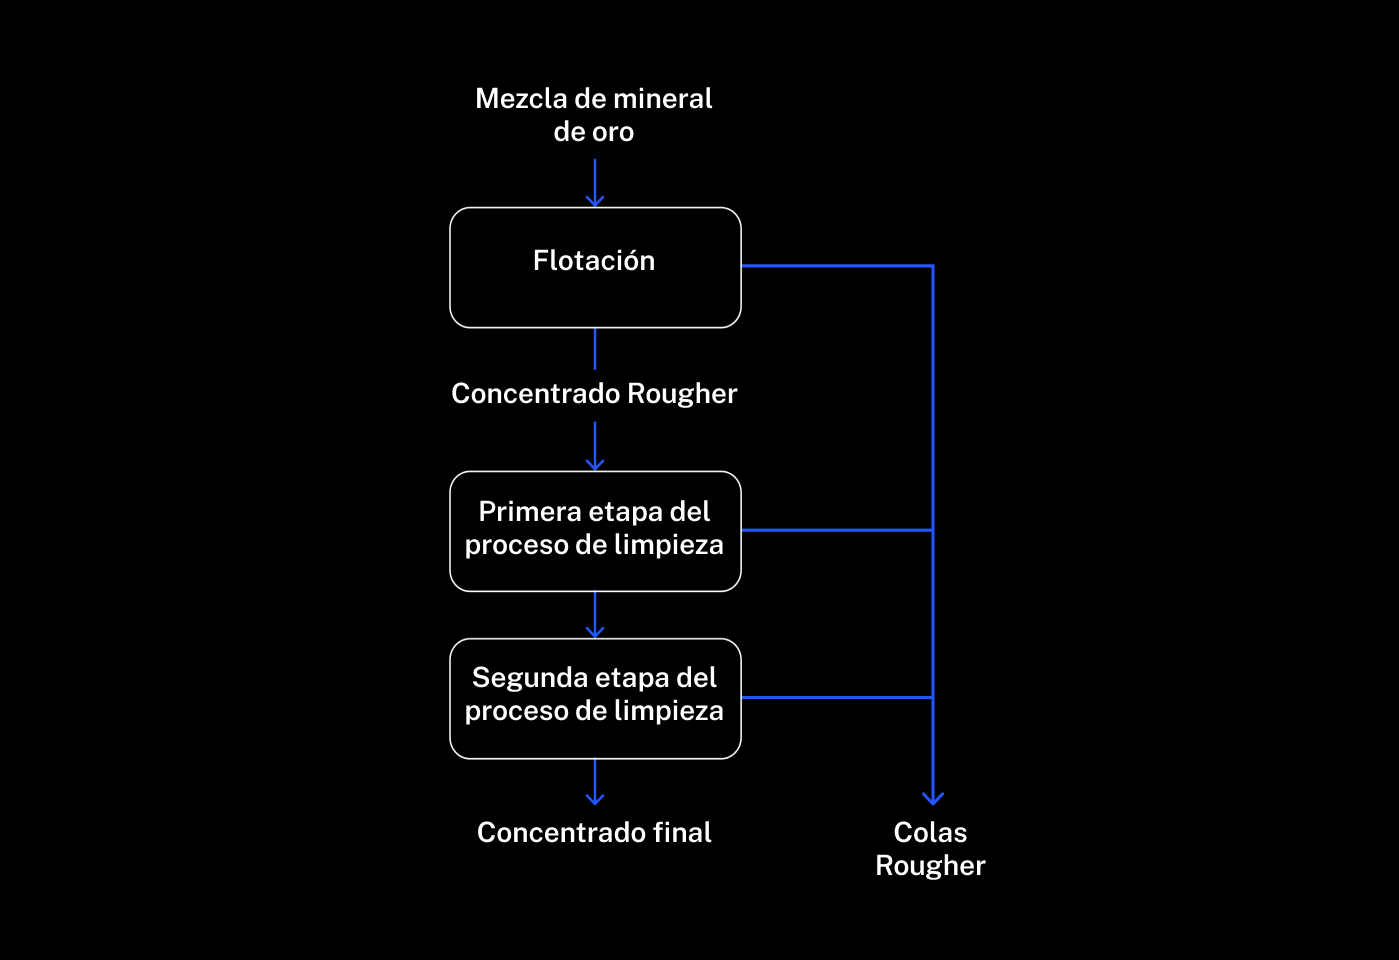

1. **Flotación**

- La mezcla de mineral de oro se introduce en las plantas de flotación para obtener un concentrado de oro rougher y colas rougher (es decir, residuos del producto con una baja concentración de metales valiosos).
        
- La estabilidad de este proceso se ve afectada por la volatilidad y el estado físico-químico desfavorable de la pulpa de flotación (una mezcla de partículas sólidas y líquido).

2. **Purificación**

- El concentrado rougher se somete a dos etapas de purificación. Tras esto, tenemos el concentrado final y las nuevas colas.

**Proceso tecnológico**

    Rougher feed: materia prima
    Rougher additions (o adiciones de reactivos): reactivos de flotación: xantato, sulfato, depresante
        Xantato: promotor o activador de la flotación
        Sulfato: sulfuro de sodio para este proceso en particular
        Depresante: silicato de sodio
    Rougher process: flotación
    Rougher tails: residuos del producto
    Float banks: instalación de flotación
    Cleaner process: purificación
    Rougher Au: concentrado de oro rougher
    Final Au: concentrado de oro final

**Parámetros de las etapas**

- air amount: volumen de aire
- fluid levels
- feed size: tamaño de las partículas de la alimentación
- feed rate

**Denominación de las características (Columnas)**

`stage`.`parameter_type`.`parameter_name`

*Ejemplo:* `rougher.input.feed_ag`

**Valores posibles para `stage`:**

- rougher: flotación
- primary_cleaner: purificación primaria
- secondary_cleaner: purificación secundaria
- final: características finales

**Valores posibles para `parameter_type`:**

- input: parámetros de la materia prima
- output: parámetros del producto
- state: parámetros que caracterizan el estado actual de la etapa
- calculation: características de cálculo

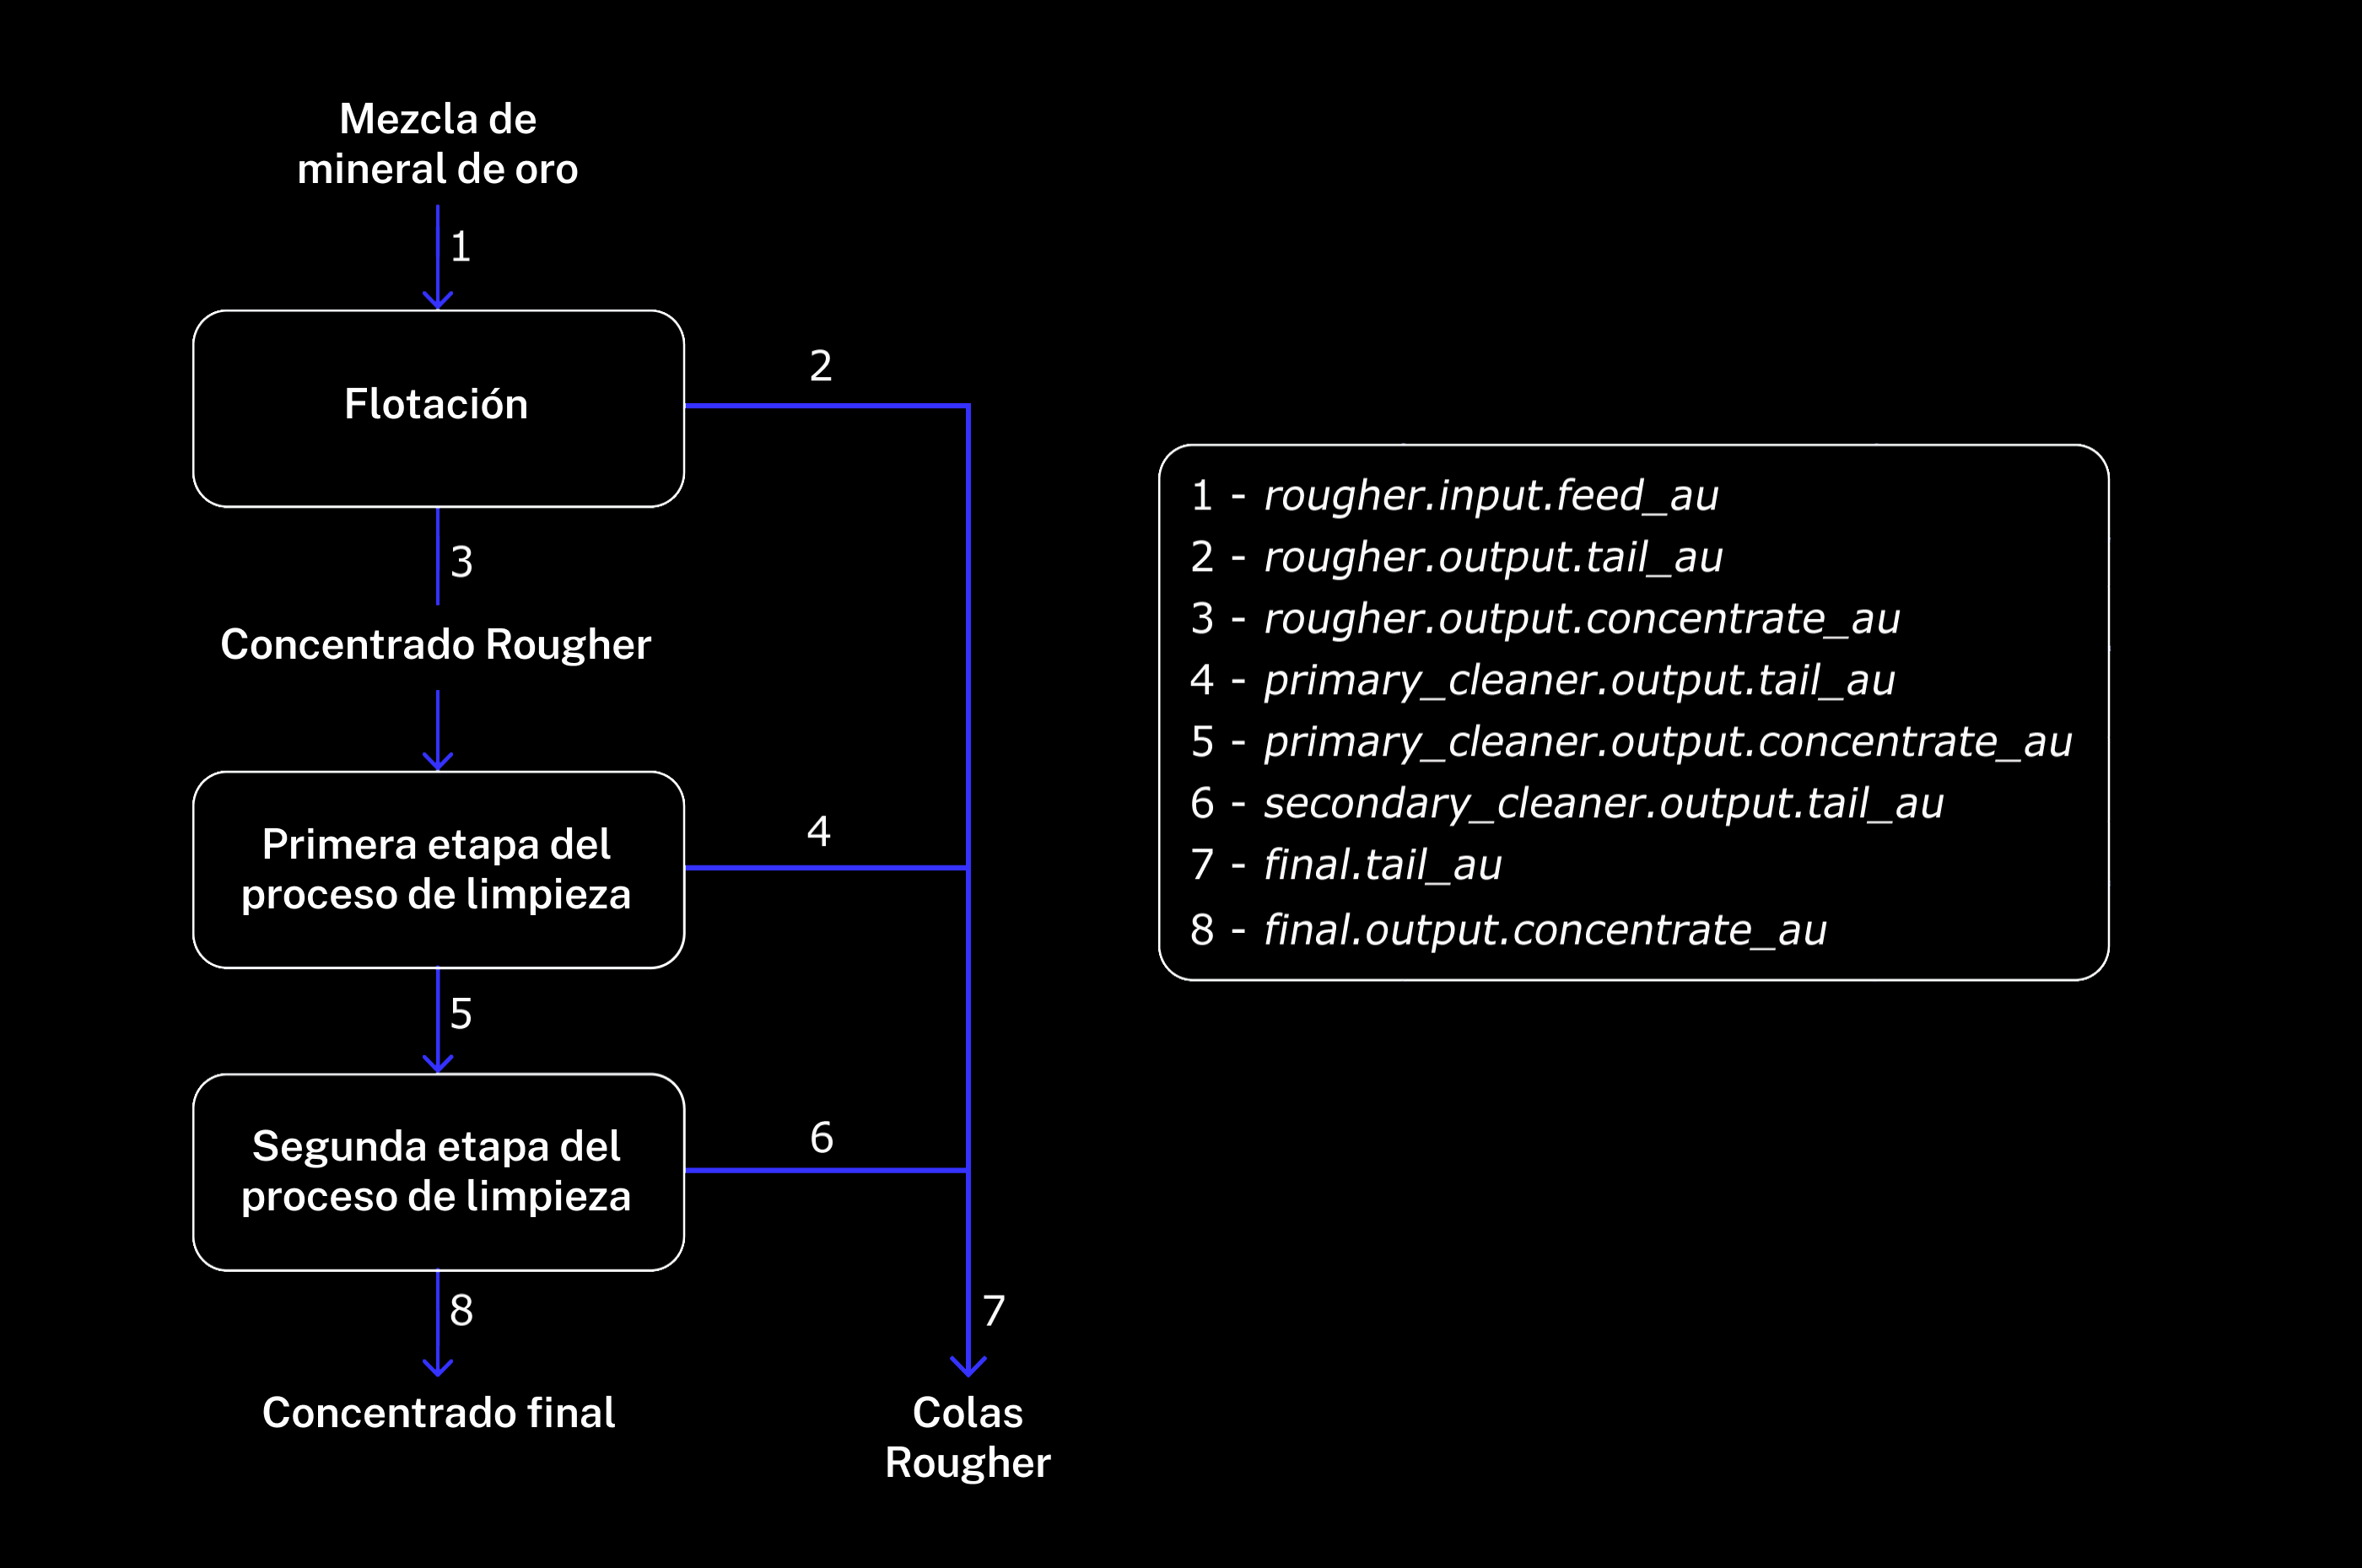

$$ Recovery = \frac{C (F - T)} {F (C - T)} * 100 $$

- C:
    - Para saber la recuperación del concentrado rougher → la proporción de oro en el concentrado justo después de la flotación.
    - Para saber la recuperación del concentrado final → la proporción de oro después de la purificación.
- F:
    - Para saber la recuperación del concentrado rougher → la proporción de oro en la alimentación antes de la flotación
    - Para saber la recuperación del concentrado final → la proporción de oro en el concentrado justo después de la flotación.
- T:
    - Para saber la recuperación del concentrado rougher → la proporción de oro en las colas rougher justo después de la flotación.
    - Para saber la recuperación del concentrado final → la proporción de oro después de la purificación.

In [6]:
# Debemos estar seguros de que la recuperacion de la primera etapa es correcta.
# Haciendo el calculo siguiendo las indicaciones mencionadas en los amrkdowns anteriores y la formula
# Obtenemos:
columnas = ['rougher.input.feed_au','rougher.output.concentrate_au','rougher.output.tail_au','rougher.output.recovery','recovery']
df0['recovery'] = (df0[columnas[1]]*(df0[columnas[0]]-df0[columnas[2]]))/(df0[columnas[0]]*(df0[columnas[1]]-df0[columnas[2]]))*100
display(df0[columnas].head())

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery,recovery
0,6.486150,19.793808,1.170244,87.107763,87.107763
1,6.478583,20.050975,1.184827,86.843261,86.843261
2,6.362222,19.737170,1.162562,86.842308,86.842308
3,6.118189,19.320810,1.079755,87.226430,87.226430
4,5.663707,19.216101,1.012642,86.688794,86.688794


**Notas:**

- Se evaluaron los valores para "rougher.output.recovery".
- Se eliminaron los valores ausentes.
- Todas las columnas teniana NaN's excepto por la columna "date".  

# Exploratory Data Analysis

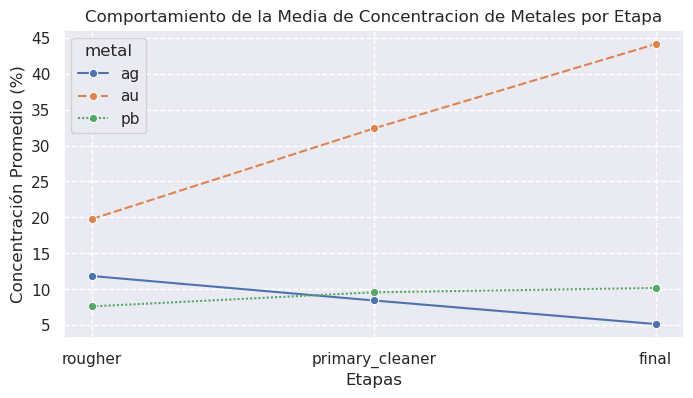

metal,ag,au,pb
rougher,11.841982,19.776788,7.612323
primary_cleaner,8.437251,32.380986,9.574924
final,5.156333,44.131636,10.172687


In [7]:
# Cambio medio en los concentrados de metal en funcion de la etapa:

# Despivot de la tabla origianl. Obtenemos una tabla de datos en formato largo: (fecha como indice, ya que es el valor unico por entrada)
identificador = ['date']
valores = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb'
]
melted = df0.melt(id_vars=identificador,value_vars=valores,var_name='etapa_metal',value_name='concentracion')
# display(melted.head())

# Para cada nombre eliminamos el fragmento repetido y separamos en dos nuevas columnas la (etapa / metal) usando expand=True de pandas.
melted[['etapa','metal']] = melted['etapa_metal'].str.split('.output.concentrate_',expand=True)
#display(melted.head())

# Creamos la tabla pivot final con los valores de media por metal en cada etapa:
pivot_1 = pd.pivot_table(melted,index='etapa',columns='metal',values='concentracion',aggfunc='mean')
# Exportacion de la tabla:
# pivot_1.to_csv('query_1',index=False)

# Re ordeno mis indices
etapa_orden = ['rougher', 'primary_cleaner', 'final']
pivot_1.index = pd.Categorical(pivot_1.index, categories=etapa_orden, ordered=True)
pivot_1 = pivot_1.sort_index()

# Graficas la tabla final:
plt.figure(figsize=(8, 4))
sns.lineplot(data=pivot_1, marker='o')
plt.title('Comportamiento de la Media de Concentracion de Metales por Etapa')
plt.xlabel('Etapas')
plt.ylabel('Concentración Promedio (%)')
plt.grid(alpha=1,linestyle='--')
plt.show()

display(pivot_1)

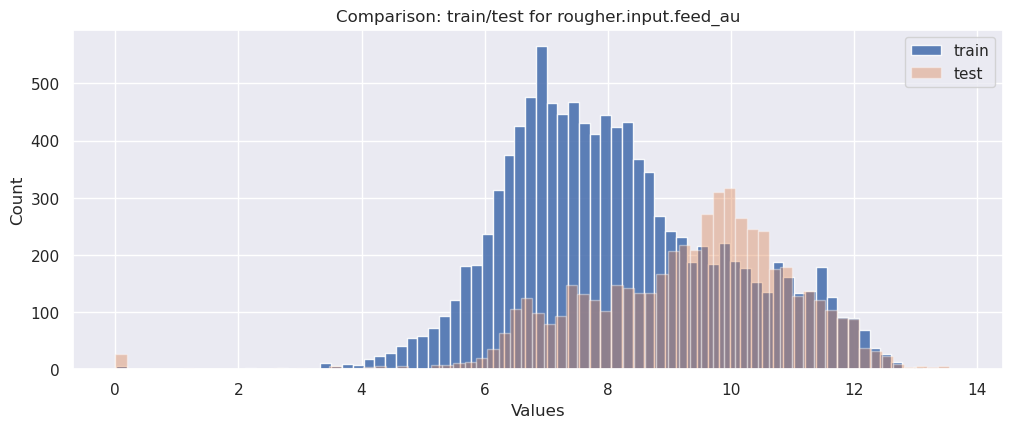

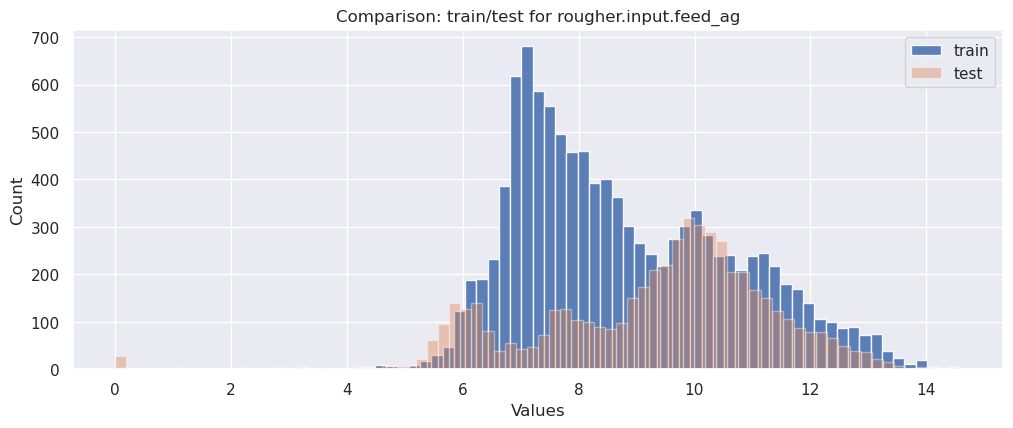

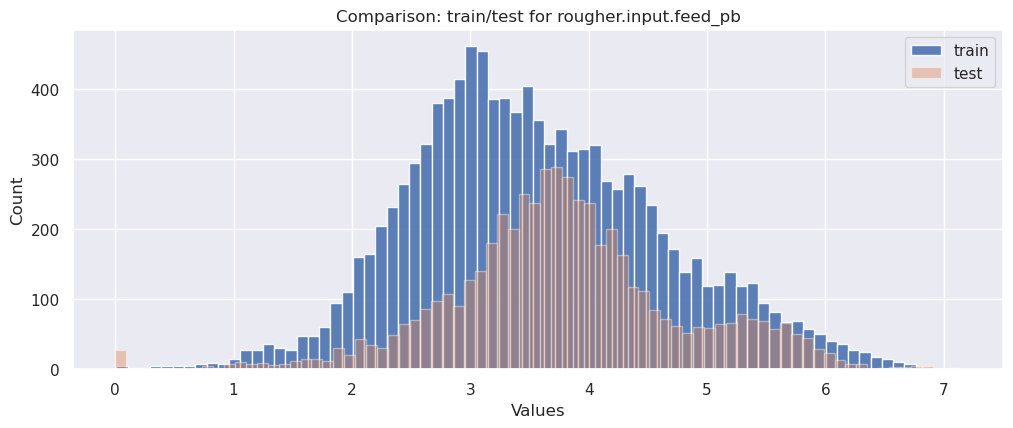

In [8]:
def comparison(data_1:pd.DataFrame, data_2:pd.DataFrame,comparison:list, labels:list, rows=1, cols=1, bins_count:int=100):
    
    length = cols * rows
    if len(labels) != length:
        return print(f'Shape labels={labels} are not equal to shape [rows={rows} * cols={cols}]')
    
    for index in range(1,len(labels)+1):
        plt.figure(figsize=(12 * cols, 5 * rows))
        plt.subplot(rows,cols,index)
        column = labels[index-1]
        plt.hist(x=data_1[column],alpha=0.9,bins=bins_count)
        plt.hist(x=data_2[column],alpha=0.4,bins=bins_count)
        plt.title(f'Comparison: {comparison[0]}/{comparison[1]} for {column}')
        plt.legend([comparison[0],comparison[1]])
        plt.ylabel('Count')
        plt.xlabel('Values')
        plt.show()

    return

comparison(
    data_1=df0,
    data_2=df1,
    comparison=['train','test'],
    labels=['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb'],
    rows=3,
    cols=1,
    bins_count=75
    )

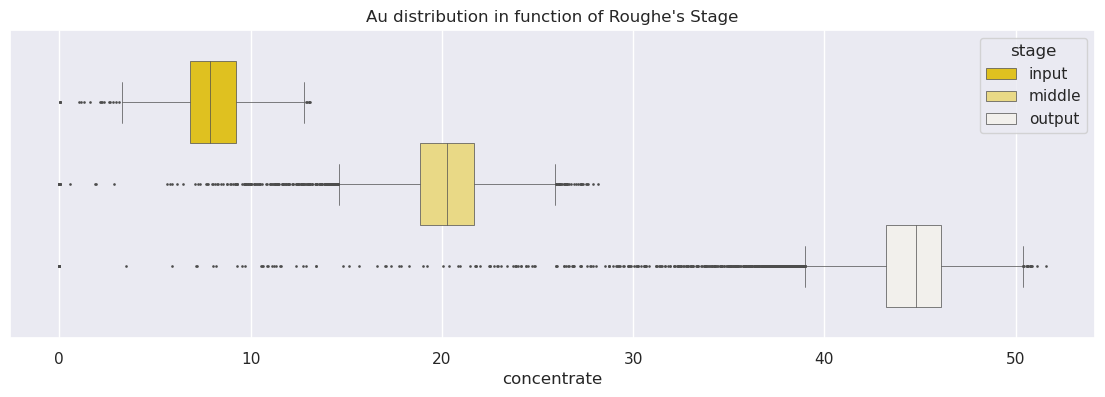

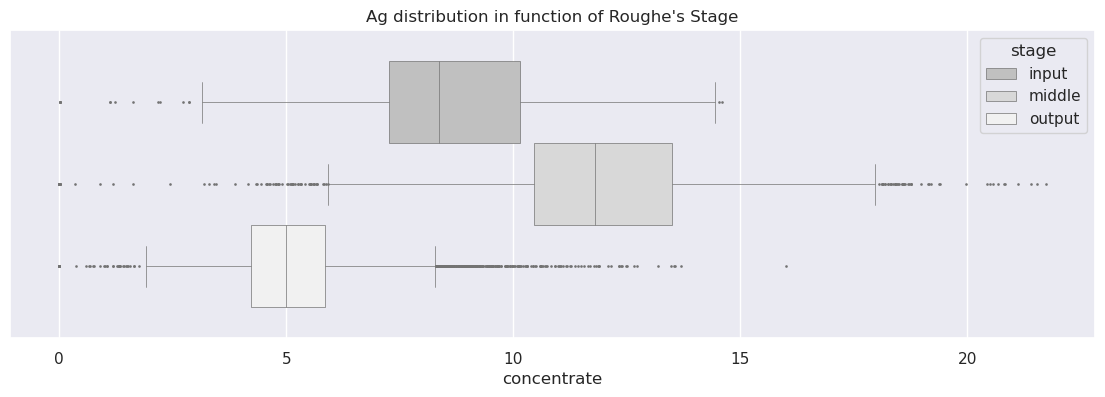

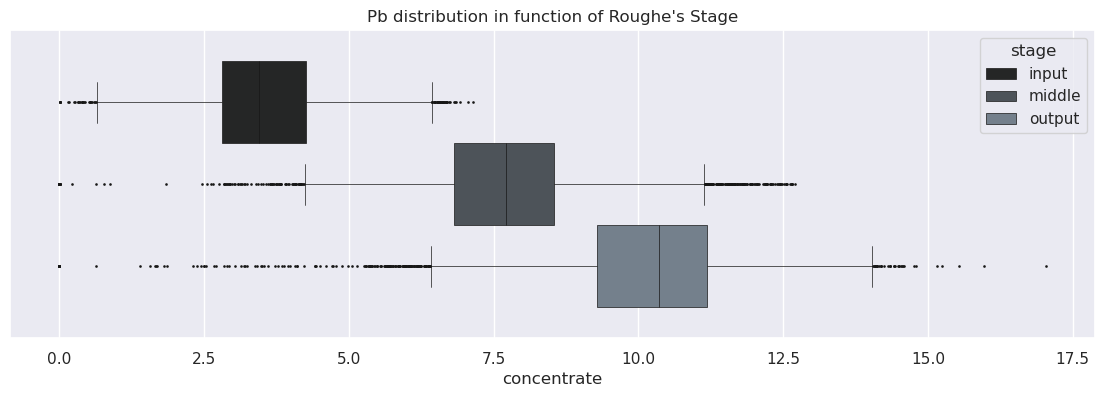

In [9]:
oro = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']
plata = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']
plomo = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']

def distribution_box_plot(data:pd.DataFrame, labels:list, id_vars:str='date',palette='flare'):

    filtro = labels + [id_vars]
    df = data[filtro]
    melted_df = df.melt(id_vars=id_vars,value_vars=labels,var_name='stage',value_name='concentrate')
    melted_df = melted_df.replace({labels[0]:'input',labels[1]:'middle',labels[2]:'output'})
    plt.figure(figsize=(14,4))
    sns.boxplot(melted_df,x='concentrate',hue='stage',palette=palette,linewidth=0.5,fliersize=0.9,legend='brief')
    plt.title(f'{(labels[0][-2:]).title()} distribution in function of Roughe\'s Stage')
    plt.show()

distribution_box_plot(df0,oro,palette=sns.light_palette("gold", n_colors=3, reverse=True))
print()
distribution_box_plot(df0,plata,palette=sns.light_palette("#C0C0C0", n_colors=3, reverse=True))
print()
distribution_box_plot(df0,plomo,palette=sns.dark_palette("slategrey", n_colors=3))

**Notas:**

    En el primer gráfico lineal podemos ver cómo la media de oro aumenta a través de cada etapa de flotación. Justo lo que se busca. Además, el aumento es lineal, lo cual debiera beneficiar al futuro modelo de regresión.

    Para la distribución de elementos de entrada para los conjuntos de entrenamiento y prueba, podemos ver que el plomo y la plata contienen un set similar de datos, mientras que el oro contiene mayor cantidad de valores en el rango de 9 a 11 unidades para la primera flotación en el conjunto de prueba.

    Para la distribución de elementos por etapa de flotación, vemos que en todos los metales se presentan outliers tanto en el extremo bajo como alto de valores. Siendo valores de 0 los mínimos, los extremos más aislados podrían interferir negativamente en el entrenamiento del futuro modelo.

    No se considera necesaria la eliminación de los outliers superiores. En el caso del oro (Au), aunque presenta los valores más altos, estos se mantienen cerca de los bigotes de la distribución, por lo que no alteran significativamente el comportamiento estadístico y representan información valiosa que se perdería al ser eliminada. Por otro lado, realizar recortes basados en la distribución de la plata o el plomo podría resultar en la eliminación accidental de valores típicos de oro, introduciendo un sesgo artificial en el modelo. En consecuencia, se ha decidido conservar la totalidad de los datos para preservar la integridad de la información.

# Preprocesamiento de Datos

In [10]:
""" El DataFrame 'Test' tiene menos variables de caracteristicas que el conjunto de 'Entrenamiento'
Para resolver esto debemos usar el DataFrame 'Completo' y unirlo a 'Test'. """

def complete_data(data1:pd.DataFrame, data2:pd.DataFrame, union:str='date'):
    """ Seleccionamos las columnas faltantes del df 'test' las filtramos en df 'completo' y unimos: """
    
    cols1 = set(data1.columns.tolist())
    cols2 = set(data2.columns.tolist())

    filtro = [col for col in cols2 if col not in cols1]
    filtered_df = data2[filtro + [union]]
    df = data1.merge(filtered_df,on=union,how='inner')
    
    return df

test = complete_data(df1, df)
# Elimino la columna 'recovery' la cual usamos para combrobar la recuperacion despues del proceso Roughe para el set de entrenamiento.
# print(test.isnull().sum()) <- No hay valores nulos
train = df0.drop(labels=['recovery'],axis=1)
# Reordeno columnas siguiendo el orden del set de entrenamiento que si esta completo. Mas adelante se vuelve a combrobar orden:
test = test[train.columns]

print(f'Dimension set "Prueba": {test.shape}')
print(f'Dimension set "Entrenamiento": {train.shape}')

Dimension set "Prueba": (5077, 87)
Dimension set "Entrenamiento": (11017, 87)


In [11]:
# Parto los dos conjuntos de datos en sus dos etapas, (concentrado Primario, concentrado Final)
def separate_stages(data, r_start, r_end, f_start, f_end):
    # Etapa Rougher (Primaria)
    rougher_stage = data.loc[:, r_start : r_end]
    
    # Etapa Final (Limpieza)
    final_stage = data.loc[:, f_start : f_end]
    
    return rougher_stage, final_stage

train_rougher, train_final = separate_stages(
    data=train,
    r_start='rougher.calculation.sulfate_to_au_concentrate',
    r_end='rougher.state.floatbank10_f_level',
    f_start='final.output.concentrate_ag',
    f_end='secondary_cleaner.state.floatbank6_a_level')

test_rougher, test_final = separate_stages(
    data=test,
    r_start='rougher.calculation.sulfate_to_au_concentrate',
    r_end='rougher.state.floatbank10_f_level',
    f_start='final.output.concentrate_ag',
    f_end='secondary_cleaner.state.floatbank6_a_level')

print(f'Dimension Sets Entrenamiento, Etapa Rougher {train_rougher.shape}, Etapa Final {train_final.shape}')
print(f'Dimension Sets Prueba, Etapa Rougher {test_rougher.shape}, Etapa Final {test_final.shape}')

Dimension Sets Entrenamiento, Etapa Rougher (11017, 35), Etapa Final (11017, 86)
Dimension Sets Prueba, Etapa Rougher (5077, 35), Etapa Final (5077, 86)


In [12]:
def get_features_target(data, extra_columns:list, target_label:str):
    """ Funcion para la obtencion de las matrices X y Y. """
    
    # Filtro Completo de columnas para la matriz de caracteristicas
    labels_to_drop = extra_columns + [target_label]

    # Creacion de las matrices de caracteristicas y objetivo
    data_features = data.drop(labels=labels_to_drop, axis=1, errors='ignore')
    data_target = data[target_label]

    return data_features, data_target

In [13]:
# Obtencion de matrices X y Y para todos los consjuntos de datos por etapa:
train_rougher_features, train_rougher_target = get_features_target(
    data=train_rougher,
    extra_columns=['date'],
    target_label='rougher.output.recovery')

train_final_features, train_final_target = get_features_target(
    data=train_final,
    extra_columns=['date'],
    target_label='final.output.recovery')

test_rougher_features, test_rougher_target = get_features_target(
    data=test_rougher,
    extra_columns=['date'],
    target_label='rougher.output.recovery')

test_final_features, test_final_target = get_features_target(
    data=test_final,
    extra_columns=['date'],
    target_label='final.output.recovery')

# Sincronización de columnas (Asegurar que X_train tenga lo mismo que X_test) esto garantiza el orden:
train_rougher_features = train_rougher_features[test_rougher_features.columns]
train_final_features = train_final_features[test_final_features.columns]

# Esta linea guarda las columnas de los sets de prueba pues mas adelante los exporto a csv y necesito convertirlos en DataFrames.
rougher_features_columns = test_rougher_features.columns.tolist()
final_features_columns = test_final_features.columns.tolist()

print('Valores NaN "train_rougher_features"',train_rougher_features.isna().sum().sum())
print('Valores NaN "test_rougher_features"',test_rougher_features.isna().sum().sum())
print()
print(f'Matrices para train etapa rougher: Matriz X = {train_rougher_features.shape}, Matriz Y = {train_rougher_target.shape}')
print(f'Matrices para train etapa final: Matriz X = {train_final_features.shape}, Matriz Y = {train_final_target.shape}')
print()
print(f'Matrices para test etapa rougher: Matriz X = {test_rougher_features.shape}, Matriz Y = {test_rougher_target.shape}')
print(f'Matrices para test etapa final: Matriz X = {test_final_features.shape}, Matriz Y = {test_final_target.shape}')

Valores NaN "train_rougher_features" 0
Valores NaN "test_rougher_features" 0

Matrices para train etapa rougher: Matriz X = (11017, 34), Matriz Y = (11017,)
Matrices para train etapa final: Matriz X = (11017, 85), Matriz Y = (11017,)

Matrices para test etapa rougher: Matriz X = (5077, 34), Matriz Y = (5077,)
Matrices para test etapa final: Matriz X = (5077, 85), Matriz Y = (5077,)


# Escalado de Datos

In [14]:
# Todas las variables son de tipo float64, la unica categorica era "date" la cual ya fue limpiada previamente.
def sets_escalator(data_train:pd.DataFrame, data_test:pd.DataFrame,labels:list):

    scaler = StandardScaler()
    
    data_train[labels] = scaler.fit_transform(data_train[labels])
    data_test[labels] = scaler.transform(data_test[labels])

    return data_train, data_test, scaler

# Rougher Stage
train_rougher_features, test_rougher_features, rougher_scaler= sets_escalator(
    train_rougher_features,
    test_rougher_features,
    rougher_features_columns)
# Final Stage
train_final_features, test_final_features, final_scaler = sets_escalator(
    train_final_features,
    test_final_features,
    final_features_columns)

print('Primeros 3 elementos de la primera fila de cada matriz de caracteristicas ya escaladadas:')
display(train_rougher_features.head(1))
display(test_rougher_features.head(1))
display(train_final_features.head(1))
display(test_final_features.head(1))

Primeros 3 elementos de la primera fila de cada matriz de caracteristicas ya escaladadas:


,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,0.006134,0.155789,0.200957,0.58253,-1.419022,-1.186288,0.491332,-0.091397,0.055155,-0.905514,...,1.579676,0.538781,1.426107,0.43377,1.93166,0.265466,1.790173,0.172271,2.253977,0.233111


,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,-0.009307,-1.158932,-1.233295,-0.365121,2.312488,1.944909,0.112417,0.290569,1.193066,2.220447,...,-0.457669,1.198233,-0.308518,1.255866,-0.124208,1.260168,-0.463239,1.229505,-0.499486,1.250331


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0.670732,-0.178057,-1.44018,-0.465015,0.305317,-1.845765,2.180918,-1.069012,-0.367857,0.232132,...,-0.954978,-0.494542,-0.543467,-0.801519,-1.117141,-0.404191,-0.797167,-0.437365,-1.068253,-2.454879


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,1.806918,0.184706,0.841034,-0.812198,1.280513,1.23732,0.051352,1.887363,1.942165,1.671775,...,-1.314941,-0.405656,-1.300441,-0.744714,-1.455476,1.220793,-1.344121,-0.427014,1.175984,0.224057


# Exportacion del Conjunto de Prueba

In [15]:
# 1. Guarda los DataFrames de prueba (con toda su precisión float64)
test_rougher_features.to_pickle('test_rougher_x.pkl')
test_final_features.to_pickle('test_final_x.pkl')

# 2. Guarda los targets
test_rougher_target.to_pickle('test_rougher_y.pkl')
test_final_target.to_pickle('test_final_y.pkl')

# Funcion Metrica sMAPE para Evaluar Modelos:

**Simetric Mean Absolute Percentage Error (sMAPE)**

$$ sMAPE = \frac {1}{N} \sum_{i=1}^N \frac {|y_i - \hat{y}_i|}{(|y| + |\hat{y}_i|) / 2} * 100 $$

In [15]:
# Definicion de la funcion que calcula en porcentaje sMAPE
def sMAPE(true_values,predictions):
    numerator = np.sum(np.abs(true_values-predictions))
    denominator = np.sum((np.abs(true_values)+np.abs(predictions))/2)
    if denominator == 0:
        return 0.0
    else:
        sMAPE = (numerator/denominator) * 100
        
        return sMAPE

# Con la funcion anterior definida se puede convertir esta en una metrica de evaluacion de scikit-learn usando "make_scorer".
# Se indica que buscamos reducir esta evaluacion, por tanto lo mejor NO es el aumento
smape_score = make_scorer(sMAPE,greater_is_better=False)

# Evaluando 3 Modelos distintos en los sets de Entrenamiento

In [19]:
# Probando 3 Modelos en la Etapa Rougher:

models = {
    'Ridge':Ridge(random_state=SEED),
    'RandomForestRegressor':RandomForestRegressor(random_state=SEED,n_estimators=150),
    'GradientBoostingRegressor':GradientBoostingRegressor(random_state=SEED,n_estimators=150)}

cross_validation = KFold(n_splits=6,shuffle=True,random_state=SEED)

results_rougher = {}

for name, model in models.items():
    print(f'Evaluando modelo {name}')
    scores = cross_val_score(
        estimator=model,
        X=train_rougher_features,
        y=train_rougher_target,
        cv=cross_validation,
        scoring=smape_score,
        n_jobs=-1)

    average_score = np.mean(-scores)
    results_rougher[name] = average_score
    
    print(f'Modelo: {name} con puntaje sMAPE promedio de {average_score:.4f}%')

best_model_rougher_name = min(results_rougher, key=results_rougher.get)
best_score_rougher = results_rougher[best_model_rougher_name]

print()
print('*'*5)
print(f'Mejor modelo validacion cruzada para etapa Rouger es {best_model_rougher_name} con un puntaje medio sMAPE de {best_score_rougher:.4f}%')

Evaluando modelo Ridge
Modelo: Ridge con puntaje sMAPE promedio de 3.7863%
Evaluando modelo RandomForestRegressor
Modelo: RandomForestRegressor con puntaje sMAPE promedio de 0.4790%
Evaluando modelo GradientBoostingRegressor
Modelo: GradientBoostingRegressor con puntaje sMAPE promedio de 0.6412%

*****
Mejor modelo validacion cruzada para etapa Rouger es RandomForestRegressor con un puntaje medio sMAPE de 0.4790%


In [20]:
# Probando 3 Modelos en la Etapa Final:
results_final = {}

for name, model in models.items():
    print(f'Evaluando modelo {name}')
    scores = cross_val_score(
        estimator=model,
        X=train_final_features,
        y=train_final_target,
        cv=cross_validation,
        scoring=smape_score,
        n_jobs=-1)

    average_score = np.mean(-scores)
    results_final[name] = average_score
    
    print(f'Modelo: {name} con puntaje sMAPE promedio de {average_score:.4f}%')

best_model_final_name = min(results_final, key=results_final.get)
best_score_final = results_final[best_model_final_name]

print()
print('*'*5)
print(f'Mejor modelo validacion cruzada para etapa Final es {best_model_final_name} con un puntaje medio sMAPE de {best_score_final:.4f}%')

Evaluando modelo Ridge
Modelo: Ridge con puntaje sMAPE promedio de 2.1648%
Evaluando modelo RandomForestRegressor
Modelo: RandomForestRegressor con puntaje sMAPE promedio de 1.2777%
Evaluando modelo GradientBoostingRegressor
Modelo: GradientBoostingRegressor con puntaje sMAPE promedio de 1.2255%

*****
Mejor modelo validacion cruzada para etapa Final es GradientBoostingRegressor con un puntaje medio sMAPE de 1.2255%


In [16]:
# Entreno los mejores modelos:
print('Entrenando modelos ganadores...')
model_stage_1 = GradientBoostingRegressor(random_state=SEED,n_estimators=150)
model_stage_1.fit(train_rougher_features,train_rougher_target)

model_stage_2 = GradientBoostingRegressor(random_state=SEED,n_estimators=150)
model_stage_2.fit(train_final_features,train_final_target)

# Obtenemos las predicciones y el valos sMAPE para cada etapa en el conjunto de prueba:
predictions_1 = model_stage_1.predict(test_rougher_features)
predictions_2 = model_stage_2.predict(test_final_features)

s_mape_1 = sMAPE(test_rougher_target, predictions_1)
s_mape_2 = sMAPE(test_final_target, predictions_2)

print(f'Puntaje sMAPE para Etapa Rougher {s_mape_1:.4f}%. Puntaje sMAPE para Etapa Final {s_mape_2:.4f}%')
print('*'*5)
print()

rougher_ratio = 0.25
final_ratio = 0.75
s_mape_ponderado = (rougher_ratio * s_mape_1) + (final_ratio * s_mape_2)

print(f'Puntaje sMAPE Ponderado Final con Ratio Rougher {rougher_ratio:.2f}, Ratio Final {final_ratio:.2f}, valor = {s_mape_ponderado:.4f}%')

Entrenando modelos ganadores...
Puntaje sMAPE para Etapa Rougher 0.7259%. Puntaje sMAPE para Etapa Final 1.4448%
*****

Puntaje sMAPE Ponderado Final con Ratio Rougher 0.25, Ratio Final 0.75, valor = 1.2651%


**Nota 1:**

    Ambos modelos fueron evaluados mediante validación cruzada (Cross-Validation), obteniendo un puntaje final ponderado del 1.22%, lo cual representa un resultado exitoso. Dada su robustez, ambos modelos poseen un alto potencial de despliegue en entornos de producción. Cabe destacar que, aunque la ingeniería de datos fue realizada por terceros, los resultados obtenidos subrayan la excelente calidad y estructura de la data original.

**Nota 2:**
    
    Por cuestion de espacio se exportaron dos modelos GradientBoostingRegressor (el primero para la primera etapa rougher, el segundo para la etapa final rougher). Su valor sMAPE ponderado con el mismo ratio 0.25(etapa rougher) y 0.75(etapa final rougher) = 1.26%. Notar que el mejor modelo para la primera etapa fue un RandomForestRegressor.

In [17]:
# Exportacion de scalers y modelos: (Para uso cambiar de 'raw' a 'code')

joblib.dump(rougher_scaler, 'scaler_rougher.joblib')
joblib.dump(final_scaler, 'scaler_final.joblib')
joblib.dump(model_stage_1, 'model_rougher_gb.joblib',compress=9)
joblib.dump(model_stage_2, 'model_final_gb.joblib',compress=9)

# Exportacion Metadata:

with open('model_metadata_rougher.json','w',encoding='utf-8') as f:
    json.dump({
        'seed':SEED,
        'n_estimators':150,
        'columnas_orden':rougher_features_columns
    },f,indent=4,ensure_ascii=False)

with open('model_metadata_final.json','w',encoding='utf-8') as f:
    json.dump({
        'seed':SEED,
        'n_estimators':150,
        'columnas_orden':final_features_columns
    },f,indent=4,ensure_ascii=False)